In [1]:
import numpy as np

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 200

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker

import seaborn as sb
from scipy import stats

In [17]:
all_df=pd.read_csv("lrsFinal.csv",header=2,nrows=106,na_values=["No Data","Not Collected"])
all_df.drop(0,inplace=True)
all_df.drop(["Number of individuals exposed to the library","Number of individuals directly engaged","Circulation per Capita.1"],axis=1,inplace=True)

numeric=['Visits', 'ILLs Loaned', 'ILLs Borrowed',
       'Total Number of Challenges', 'Total Collection Use',
       'Total Circulation', 'Annual Operating Hours', 'Average hours open per week, per outlet', 'Website Visits',
       'Public Access Internet Computers', 'Total Print Expenditures',
       'Total Collection Expenditures', 'Miscellaneous Operating Expenditures',
       'Total Operating Expenditures', 'Capital Expenditures',
       'Staff Salaries', 'Number of Bookmobiles',
       'Staff Expenditures per Capita', 'Materials Expenditures per Capita',
       'Other Expenditures per Capita', 'Total Expenditures per Capita',
       'Local Revenue per Capita',
       'Staff Expenditures as Percent of Total Operating Expenditures',
       'Materials Expenditures as Percent of Total Operating Expenditures',
       'LSA Population', 'LSA Registered Borrowers',
       'Number of Non-Resident Registered Borrowers',
       'Total Registered Borrowers', 'Staff per 1,000 Served',
       'Print Volumes per Capita', 'Registration as Percent of Population',
       'Library Visits per Capita', 'Circulation per Capita',
       #'Number of individuals directly engaged',
       #'Number of individuals exposed to the library',
       #'Circulation per Capita.1', 
       'Program Attendance per 1,000 Served',
       'Total Programs', 'Total Program Attendance', 'Local Capital Revenue',
       'State Capital Revenue', 'Federal Capital Revenue',
       'Other Capital Revenue', 'Total Capital Revenue', 'City General Fund',
       'County General Fund', 'City Sales Tax', 'County Sales Tax',
       'City Mill Levy', 'County Mill Levy', 'District Mill Levy',
       'Total Local Operating Revenue', 'Total State Operating Revenue',
       'Total Federal Operating Revenue', 'Other Operating Revenue',
       'Total Operating Revenue', 'Non-Supervising Librarian Salary (high)',
       'Non-Supervising Librarian Salary (low)', 'Library Assistant (high)', 'Library Assistant (low)',
       'Library Clerk Hourly (high)', 'Library Clerk Hourly (low)',
       'ALA-MLS Librarians (FTE)', 'Total Librarians (FTE)',
       'Other Paid Staff (FTE)', 'Total Staff (FTE)'] ##need to replace commas and pd.to_numeric()
booleans=['Automatic Renewals',
       "Overdue Fines for Children's Books", 'Overdue Fines for YA Books',
       'Overdue Fines for Adult Books','MLS Required - Librarian'] ##need to replace yes/no with 1/0
strings=['Library', 'City', 'County', 'Legal Basis'] ##need to change individually for new rows
aggdict={}
for i in numeric:
    #print(all_df[i].dtype)
    if all_df[i].dtype==object:
        all_df[i]=all_df[i].str.replace(',','')
        all_df[i]=all_df[i].str.replace('$','')
        all_df[i]=all_df[i].str.replace('%','')
        all_df[i]=all_df[i].str.replace('(','')
        all_df[i]=all_df[i].str.replace(')','')
        all_df[i]=pd.to_numeric(all_df[i])
        aggdict[i]="mean"
    #print(all_df[i].dtype)
for i in booleans:
    #print(all_df[i].dtype)
    all_df[i]=all_df[i].str.replace('Yes','1')
    all_df[i]=all_df[i].str.replace('yes','1')
    all_df[i]=all_df[i].str.replace('No','0')
    all_df[i]=all_df[i].str.replace('no','0')
    all_df[i]=pd.to_numeric(all_df[i])
    aggdict[i]="mean"
    #print(all_df[i].dtype)
combined=numeric+booleans
all_df["Legal Basis"]=all_df["Legal Basis"].str.replace('LD','Library District')
all_df["Legal Basis"]=all_df["Legal Basis"].str.replace('CI','City Library')
all_df["Legal Basis"]=all_df["Legal Basis"].str.replace('CO','County Library')
all_df["Legal Basis"]=all_df["Legal Basis"].str.replace('CC','City Library')

boulder=["NaN"]*72
for i in range(0,len(all_df.columns)):
    if i!=32:
        boulder[i]=all_df.loc[9][all_df.columns[i]]
    else:
        boulder[i]="Boulder Public Library"

all_df.loc[106]=boulder


def lt(o1,o2):
    if o1<=o2:
        return o1
    else:
        return o2

interesting=all_df["Legal Basis"].unique().tolist()
groupby=all_df.groupby("Legal Basis").agg(aggdict)

def lrsBarChart(colName):
    plt.rcParams.update({'figure.autolayout': True})
    f,ax=plt.subplots(figsize=(5,5))
    ax.bar(
        x=interesting,
        height=groupby[colName],
        #yerr=([0,lt(all_df.loc[108][colName],int_df.loc[106][colName]),lt(all_df.loc[109][colName],int_df.loc[107][colName])],[0,all_df.loc[108][colName],all_df.loc[109][colName]])
        
    )
    ax.set_title(colName+" Between\nMunicipal, County, and District Libraries in 2021")
    ax.set_ylabel(colName)
    ax.set_xlabel("*Municipal, County, and District Categories are averages of\nall libraries of respective types in Colorado in 2021")
    labels = ax.get_xticklabels()
    plt.setp(labels,rotation=25);

In [18]:
boulder=["NaN"]*72
for i in range(0,len(all_df.columns)):
    if i!=32:
        boulder[i]=all_df.loc[9][all_df.columns[i]]
    else:
        boulder[i]="Boulder Public Library"

all_df.loc[106]=boulder


C:\Users\rah20\AppData\Local\Temp\ipykernel_13120\80470746.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f,ax=plt.subplots(figsize=(5,5))


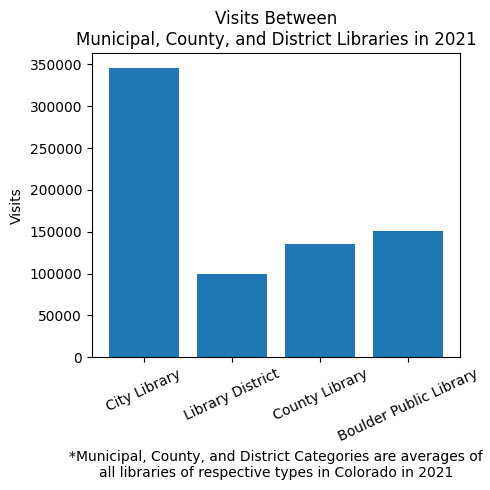

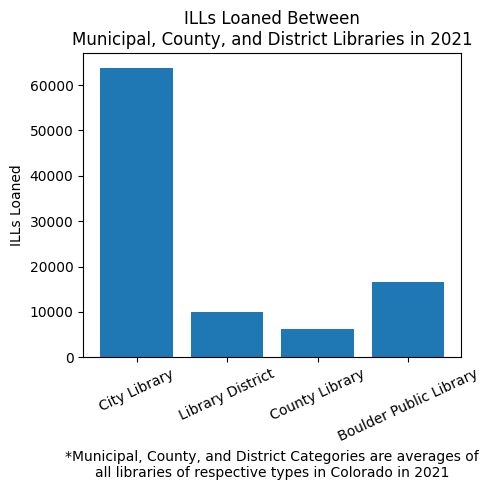

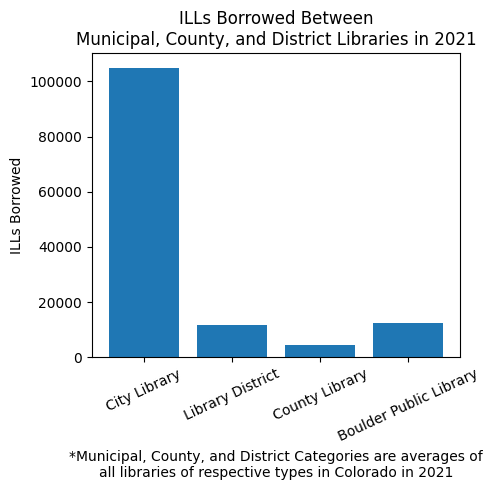

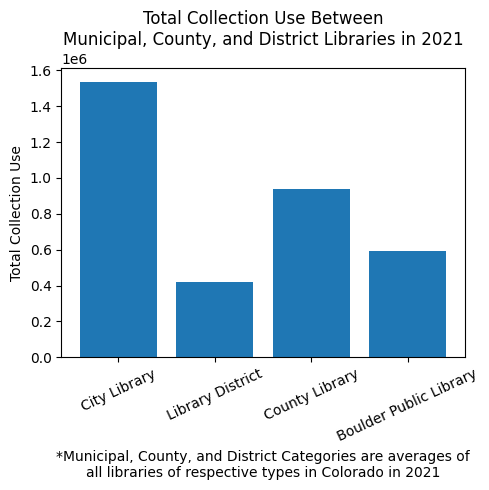

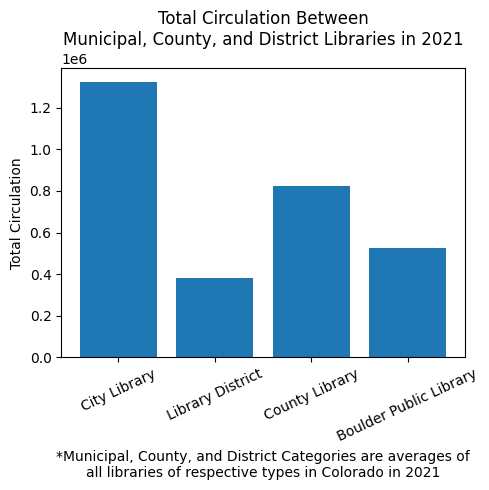

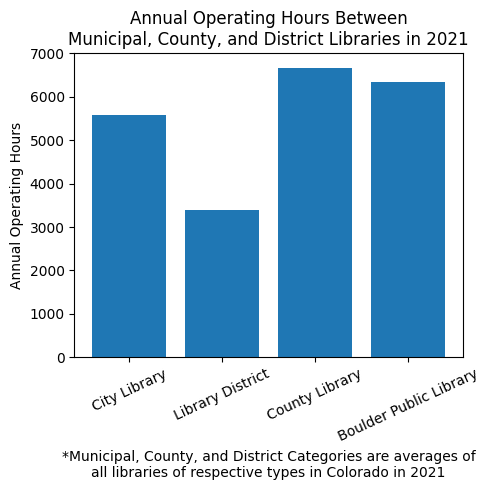

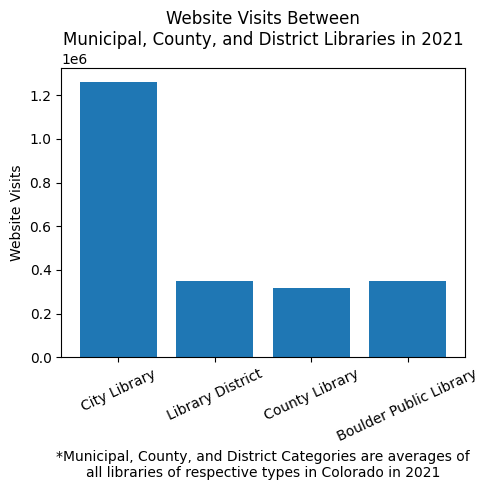

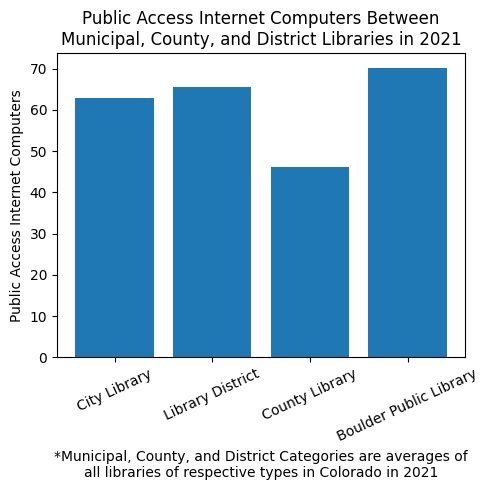

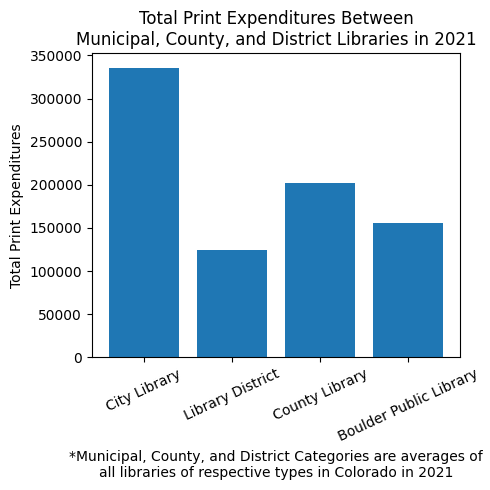

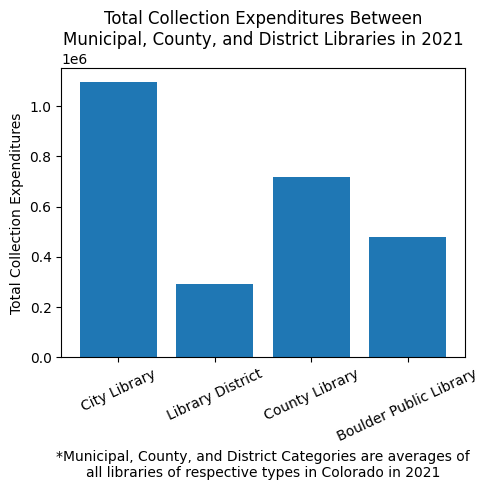

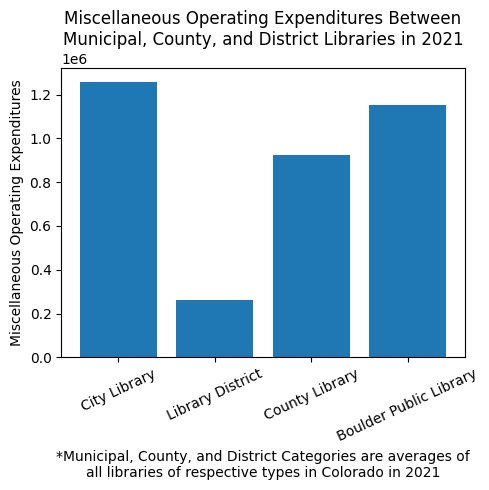

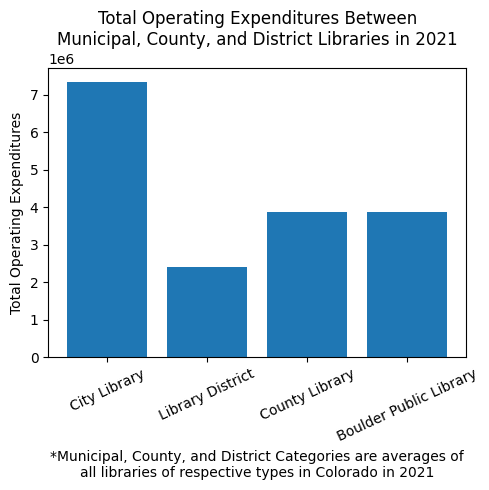

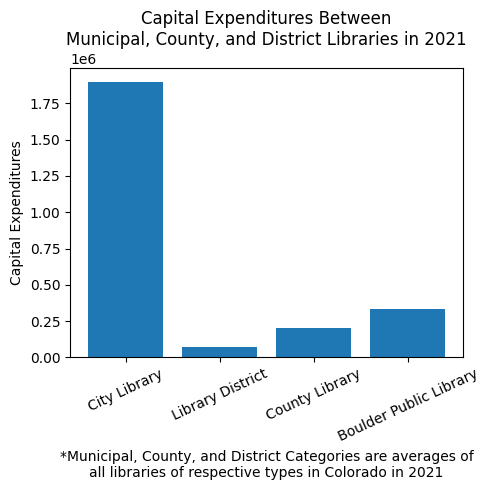

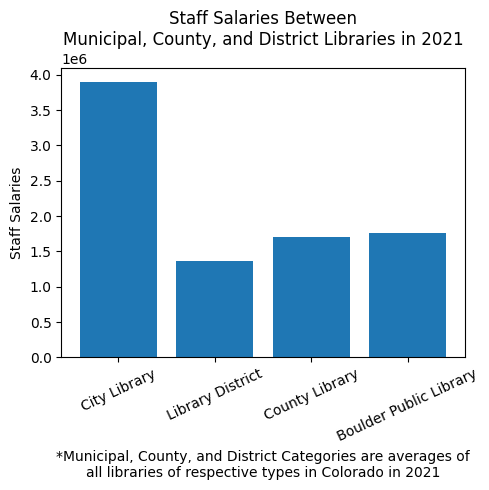

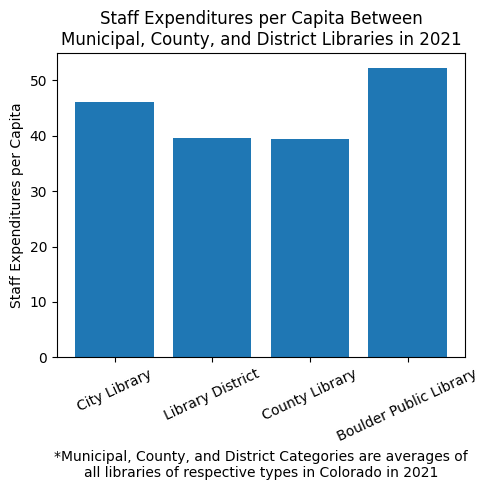

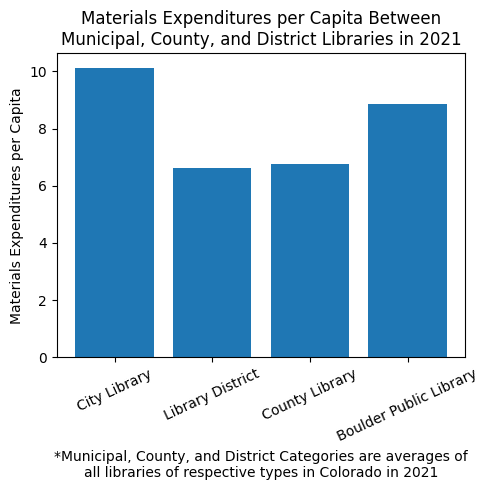

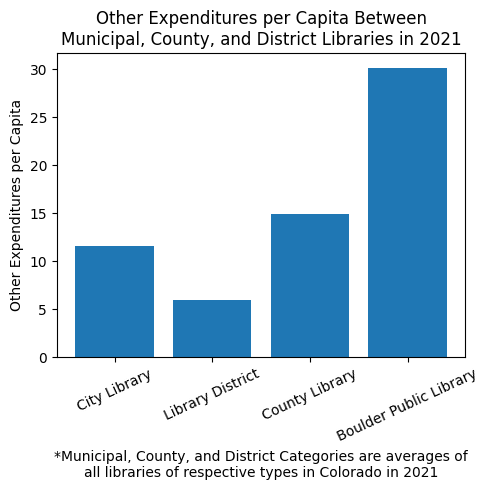

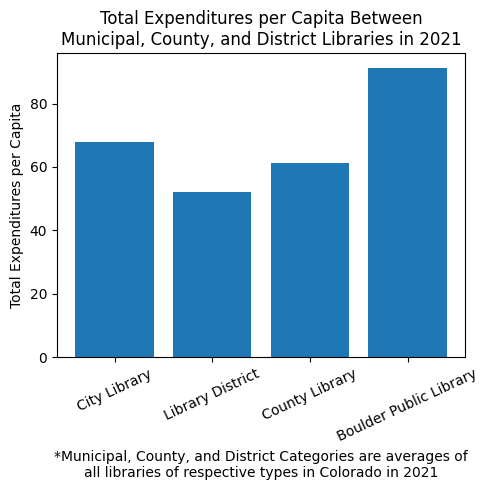

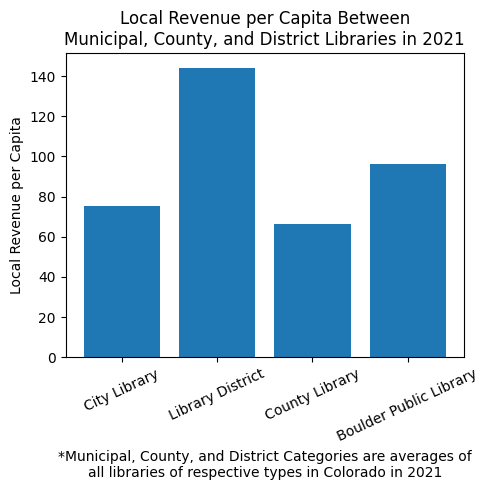

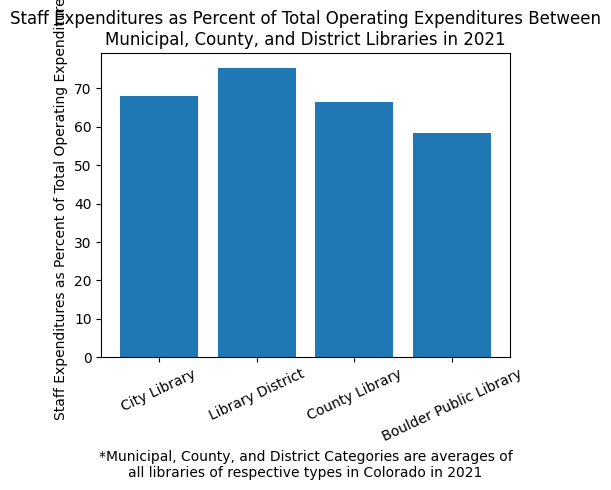

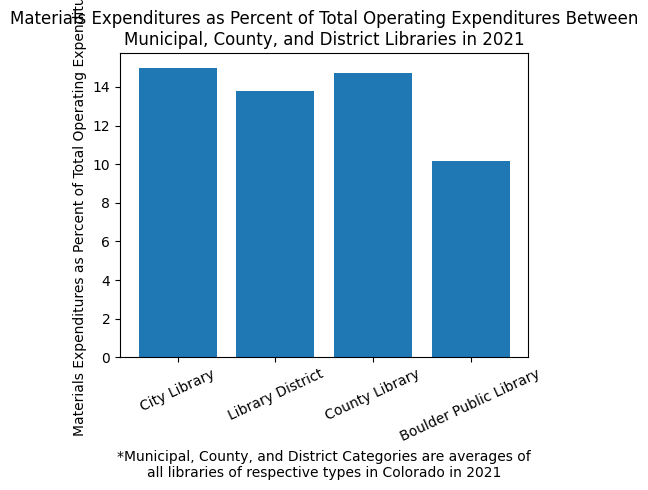

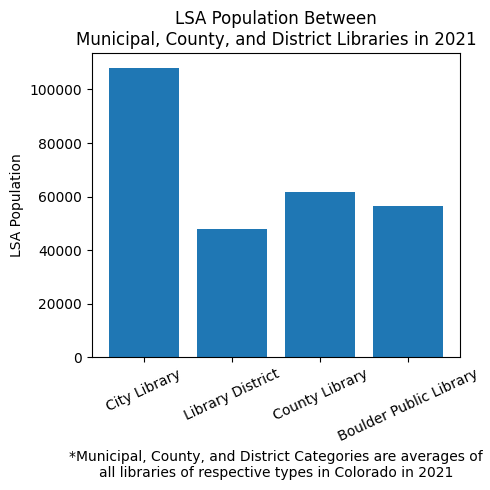

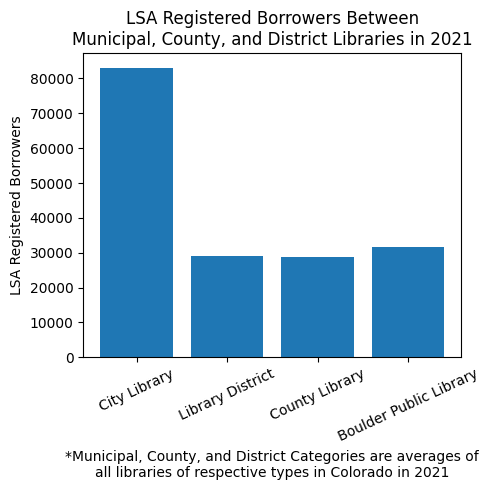

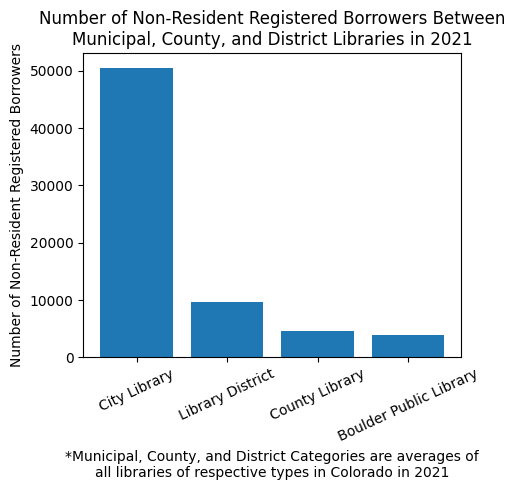

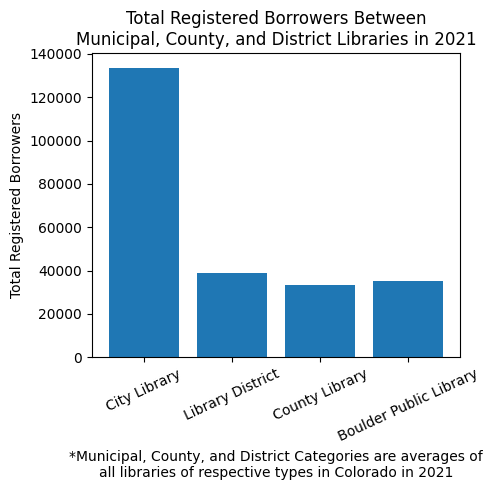

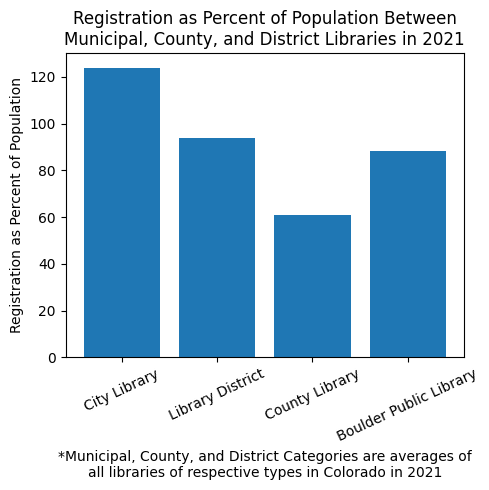

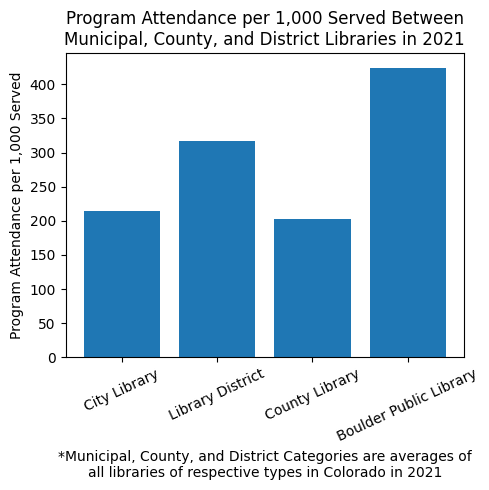

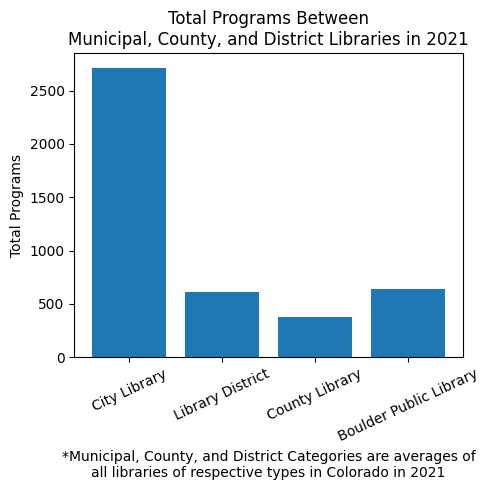

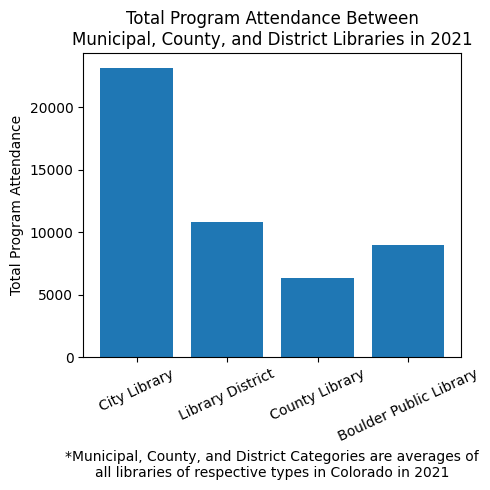

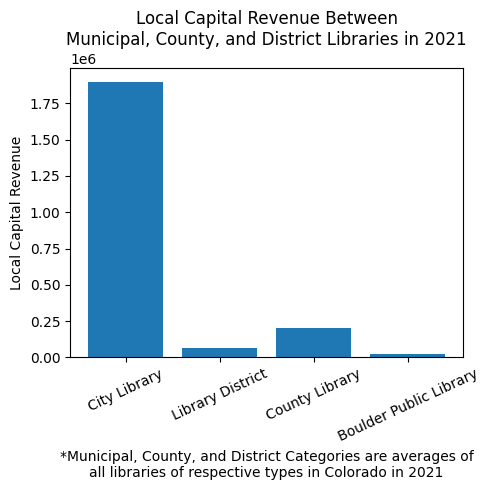

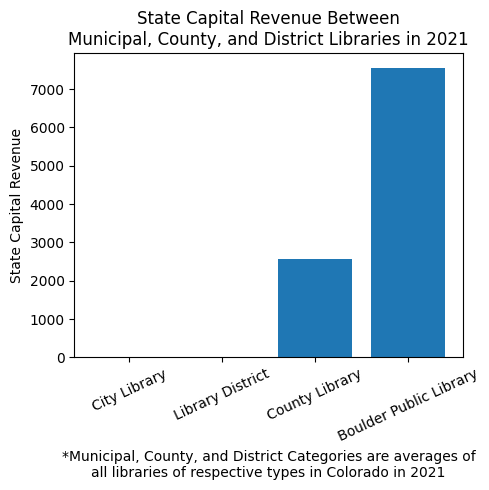

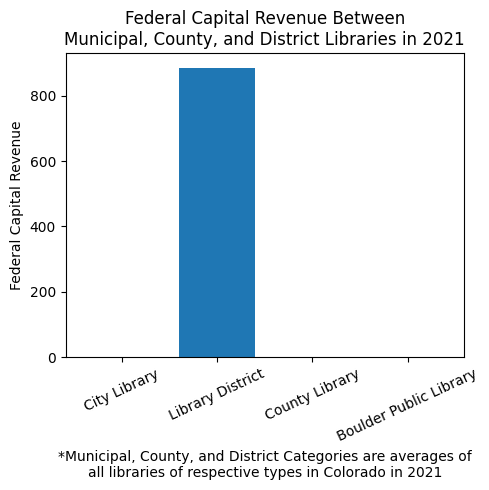

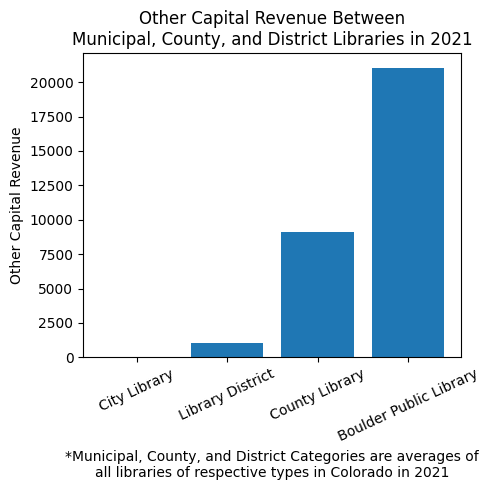

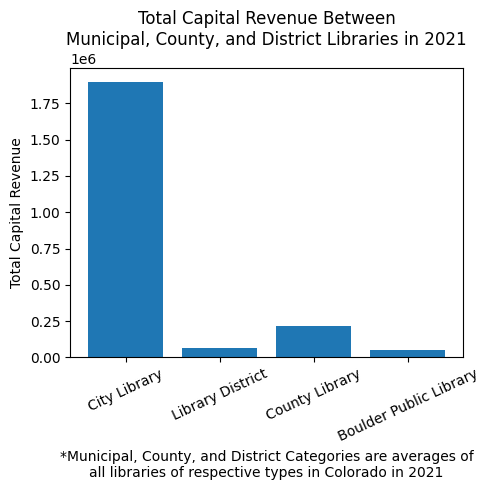

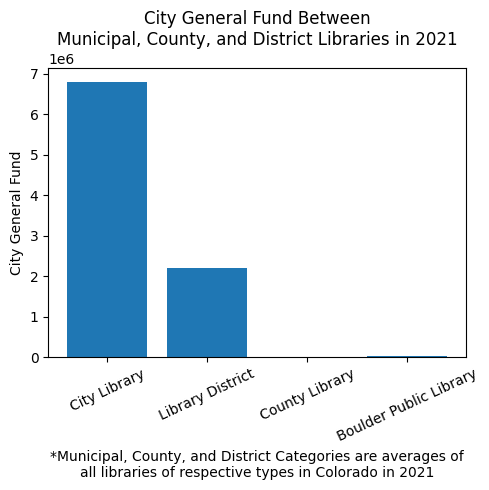

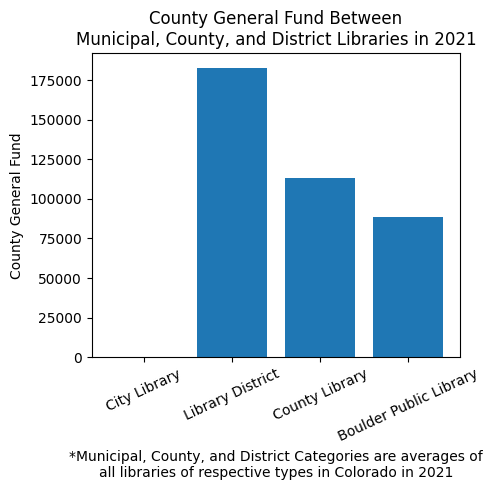

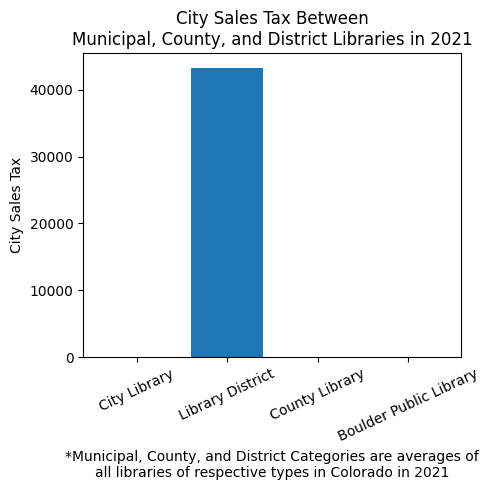

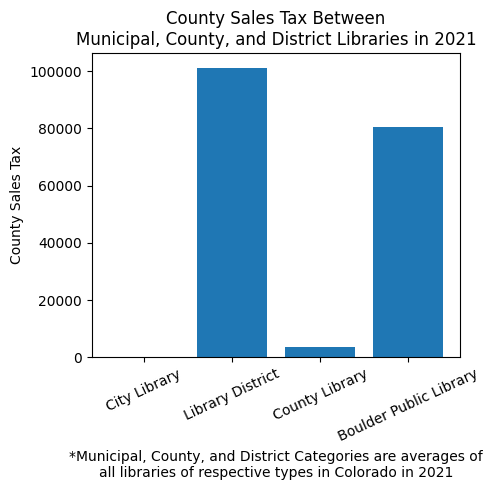

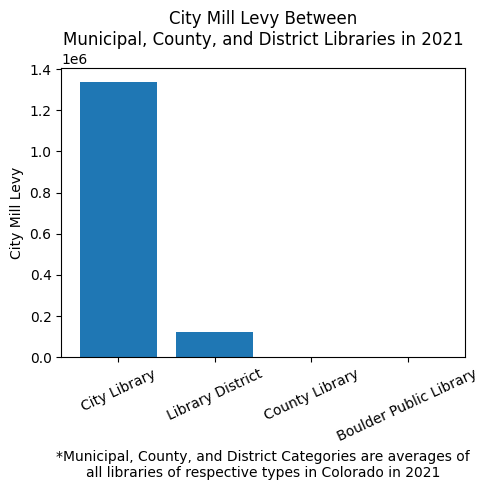

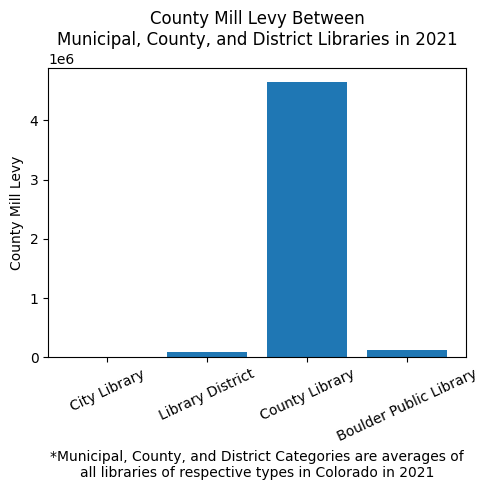

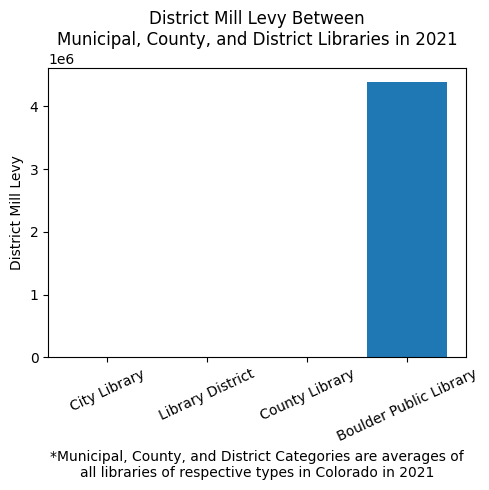

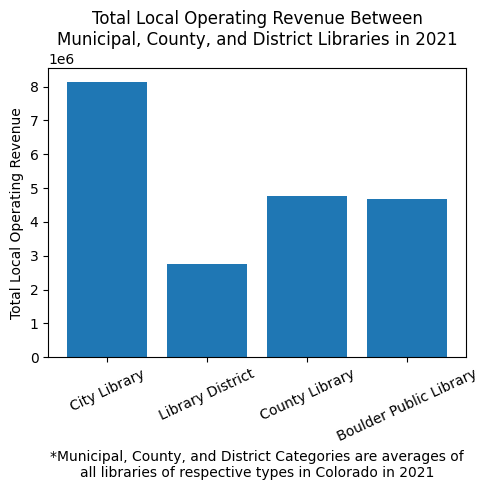

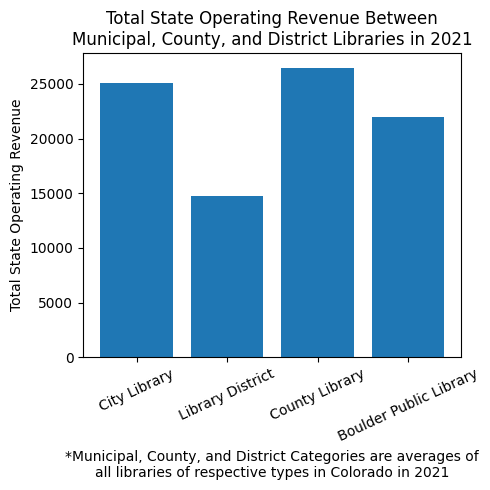

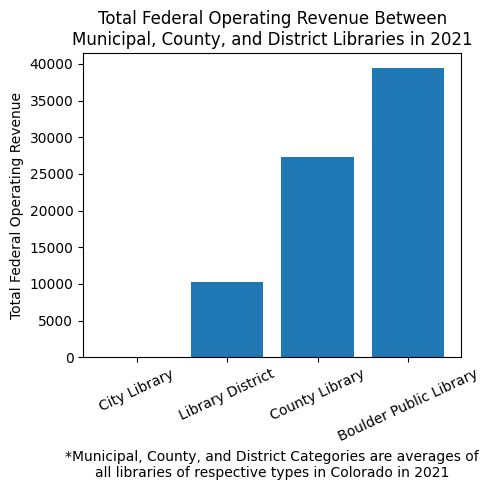

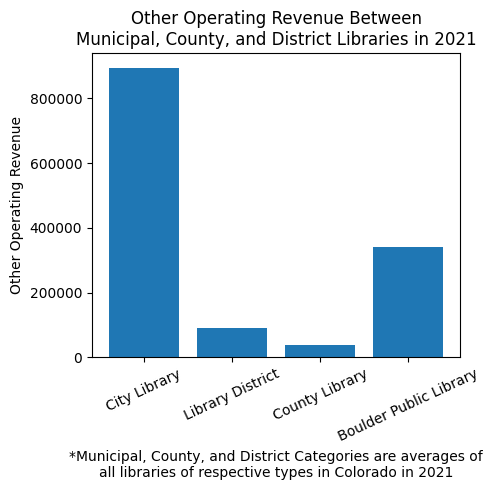

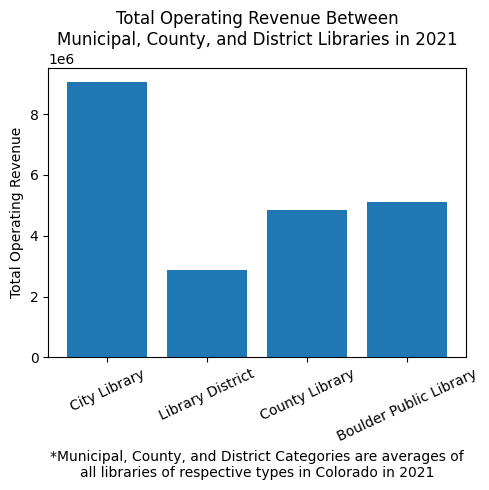

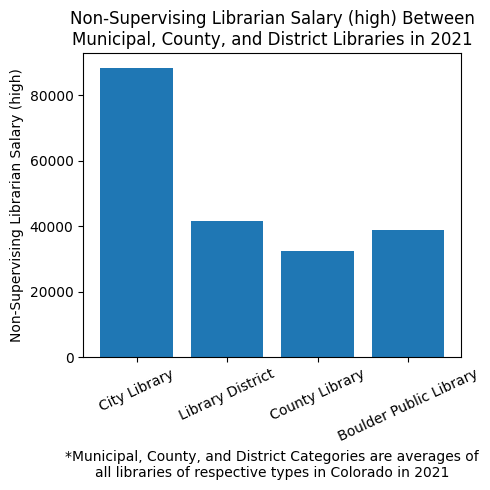

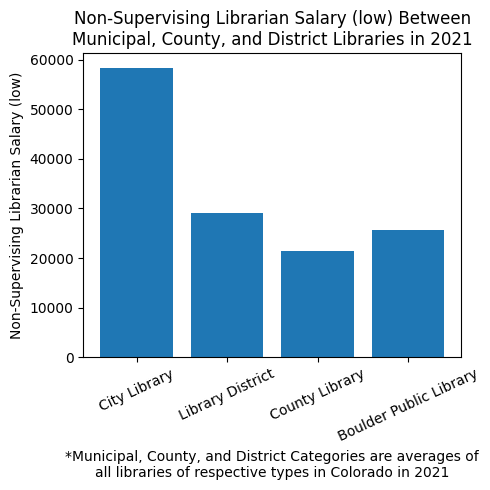

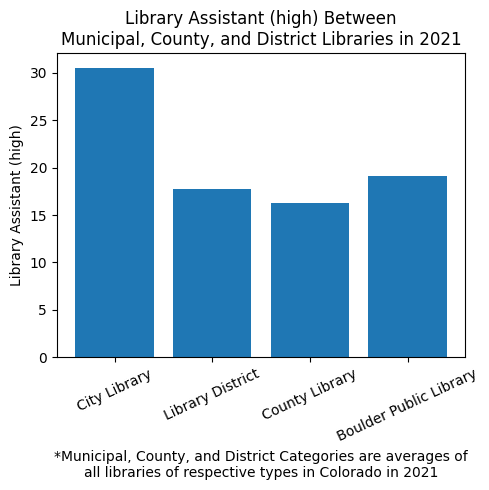

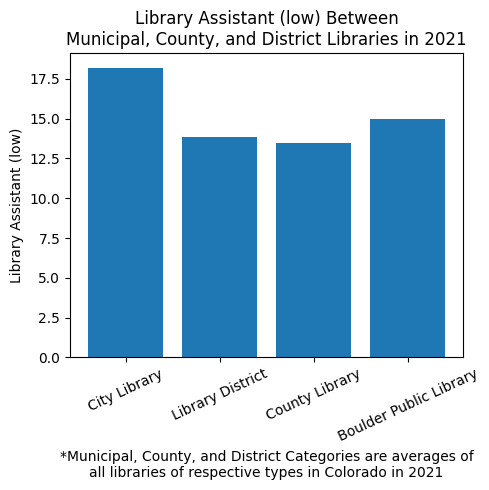

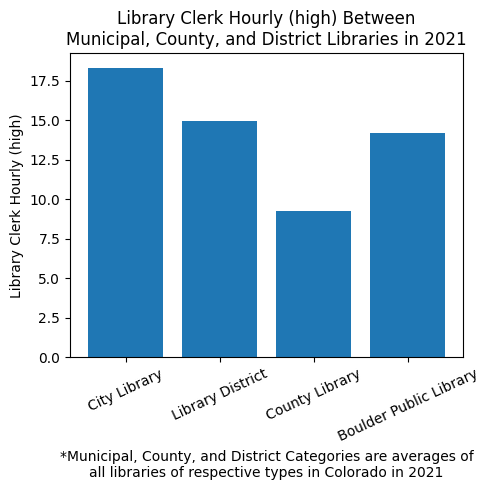

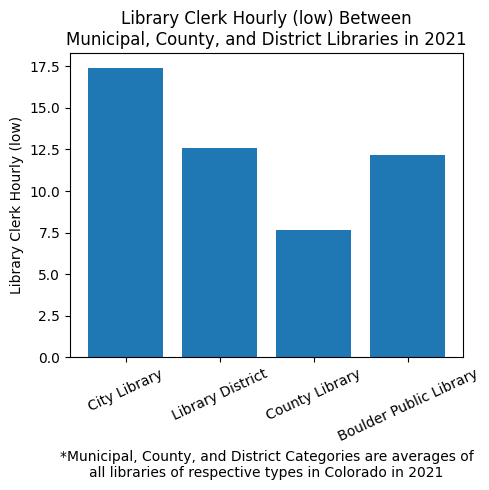

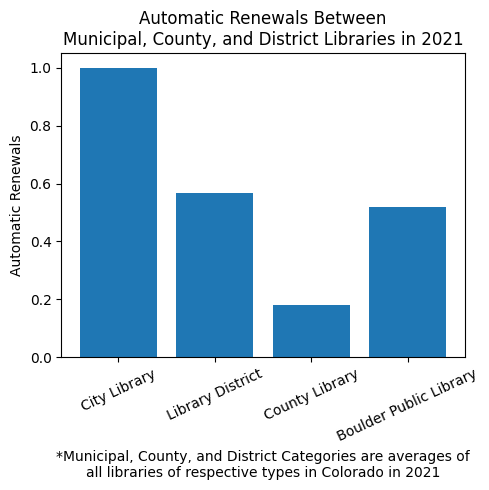

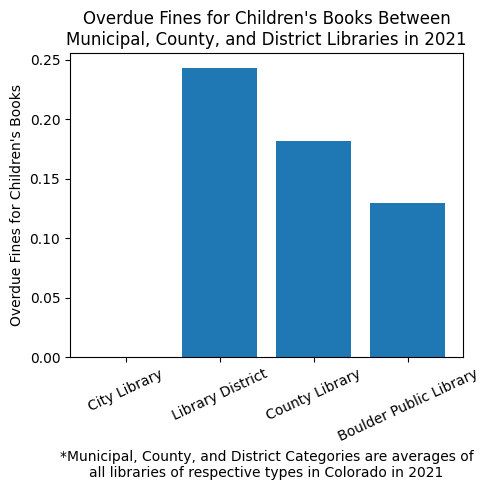

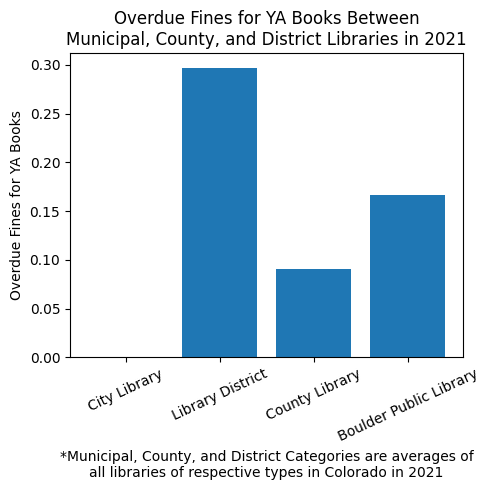

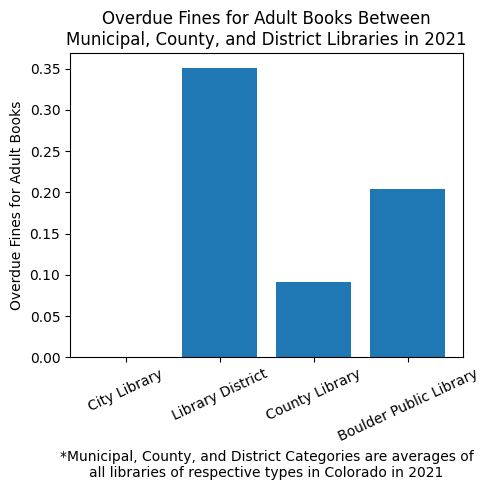

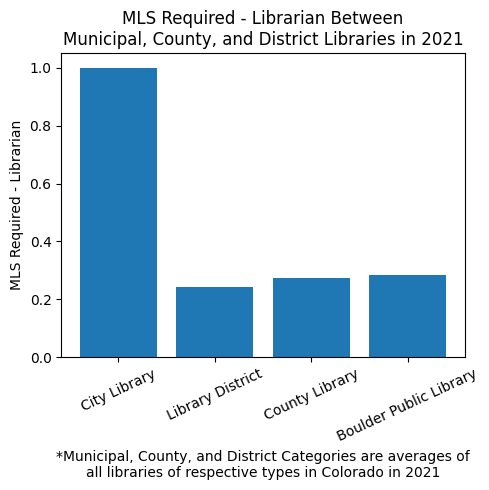

In [19]:
for i in groupby.columns:
    lrsBarChart(i)

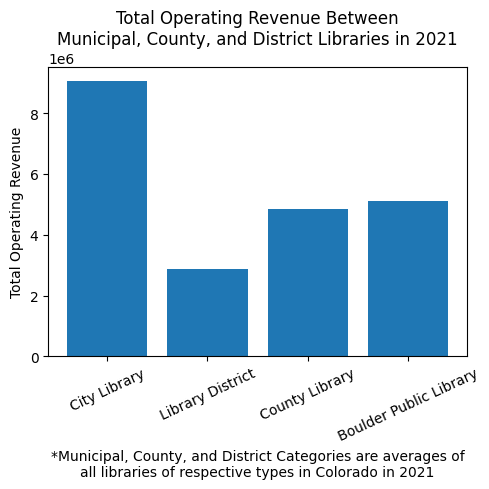

In [21]:
lrsBarChart("Total Operating Revenue")
plt.savefig("oprev.png")

In [6]:
def lrs_stripplot(colName,ax):
    sb.stripplot(data=all_df,y="Legal Basis",x=colName,ax=ax)

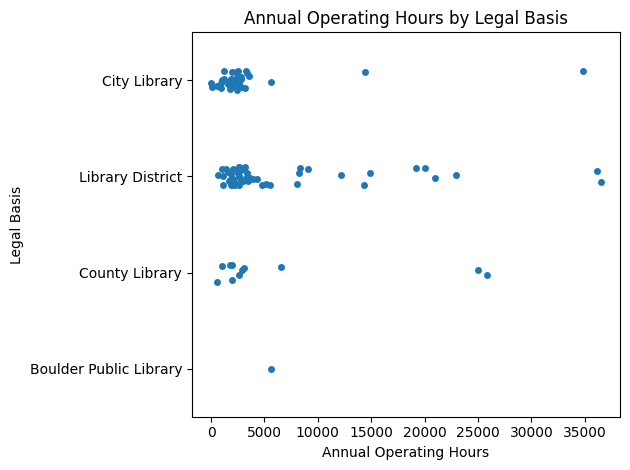

In [13]:
f,ax=plt.subplots()
sb.stripplot(data=all_df,y="Legal Basis",x="Annual Operating Hours",ax=ax)
ax.set_title("Annual Operating Hours by Legal Basis")
plt.savefig("operating.png")

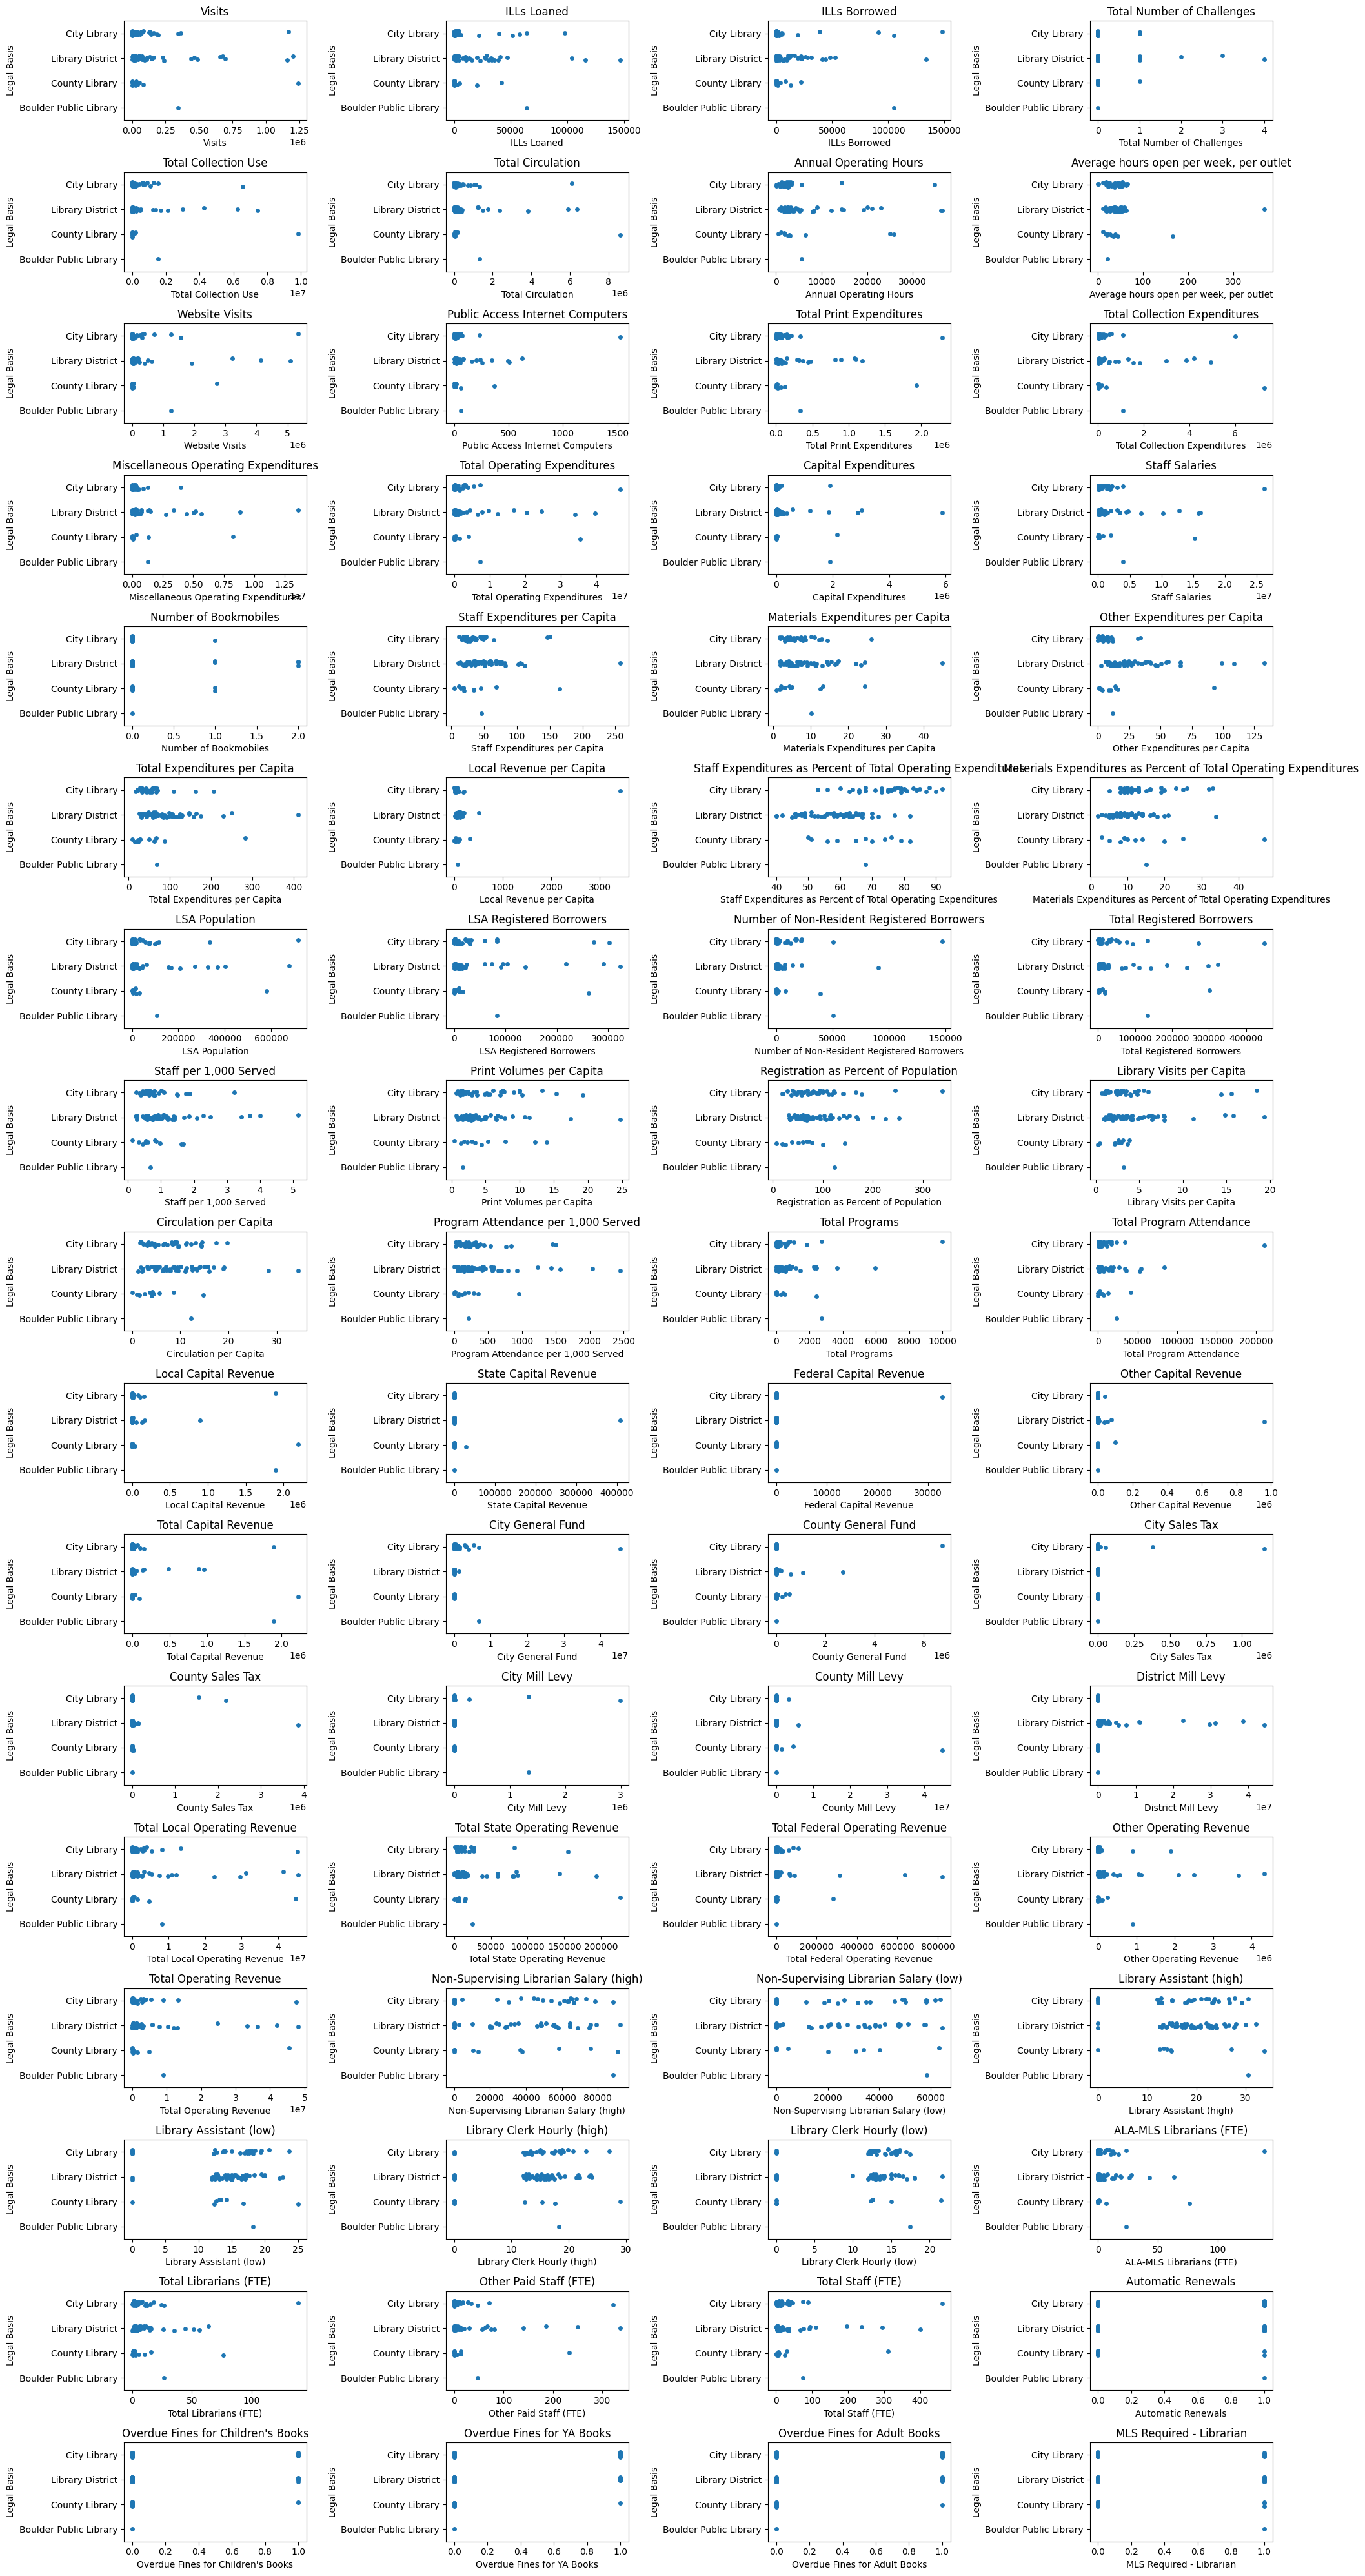

In [8]:
fig,axs = plt.subplots(17,4,figsize=(20,40))
counter=0
for i in range(0,17):
    for j in range(0,4):
        lrs_stripplot(combined[counter],axs[i,j])
        axs[i,j].set_title(combined[counter])
        counter+=1

In [9]:
def lrs_vilplot(colName,ax):
    sb.violinplot(data=all_df,y="Legal Basis",x=colName,ax=ax)

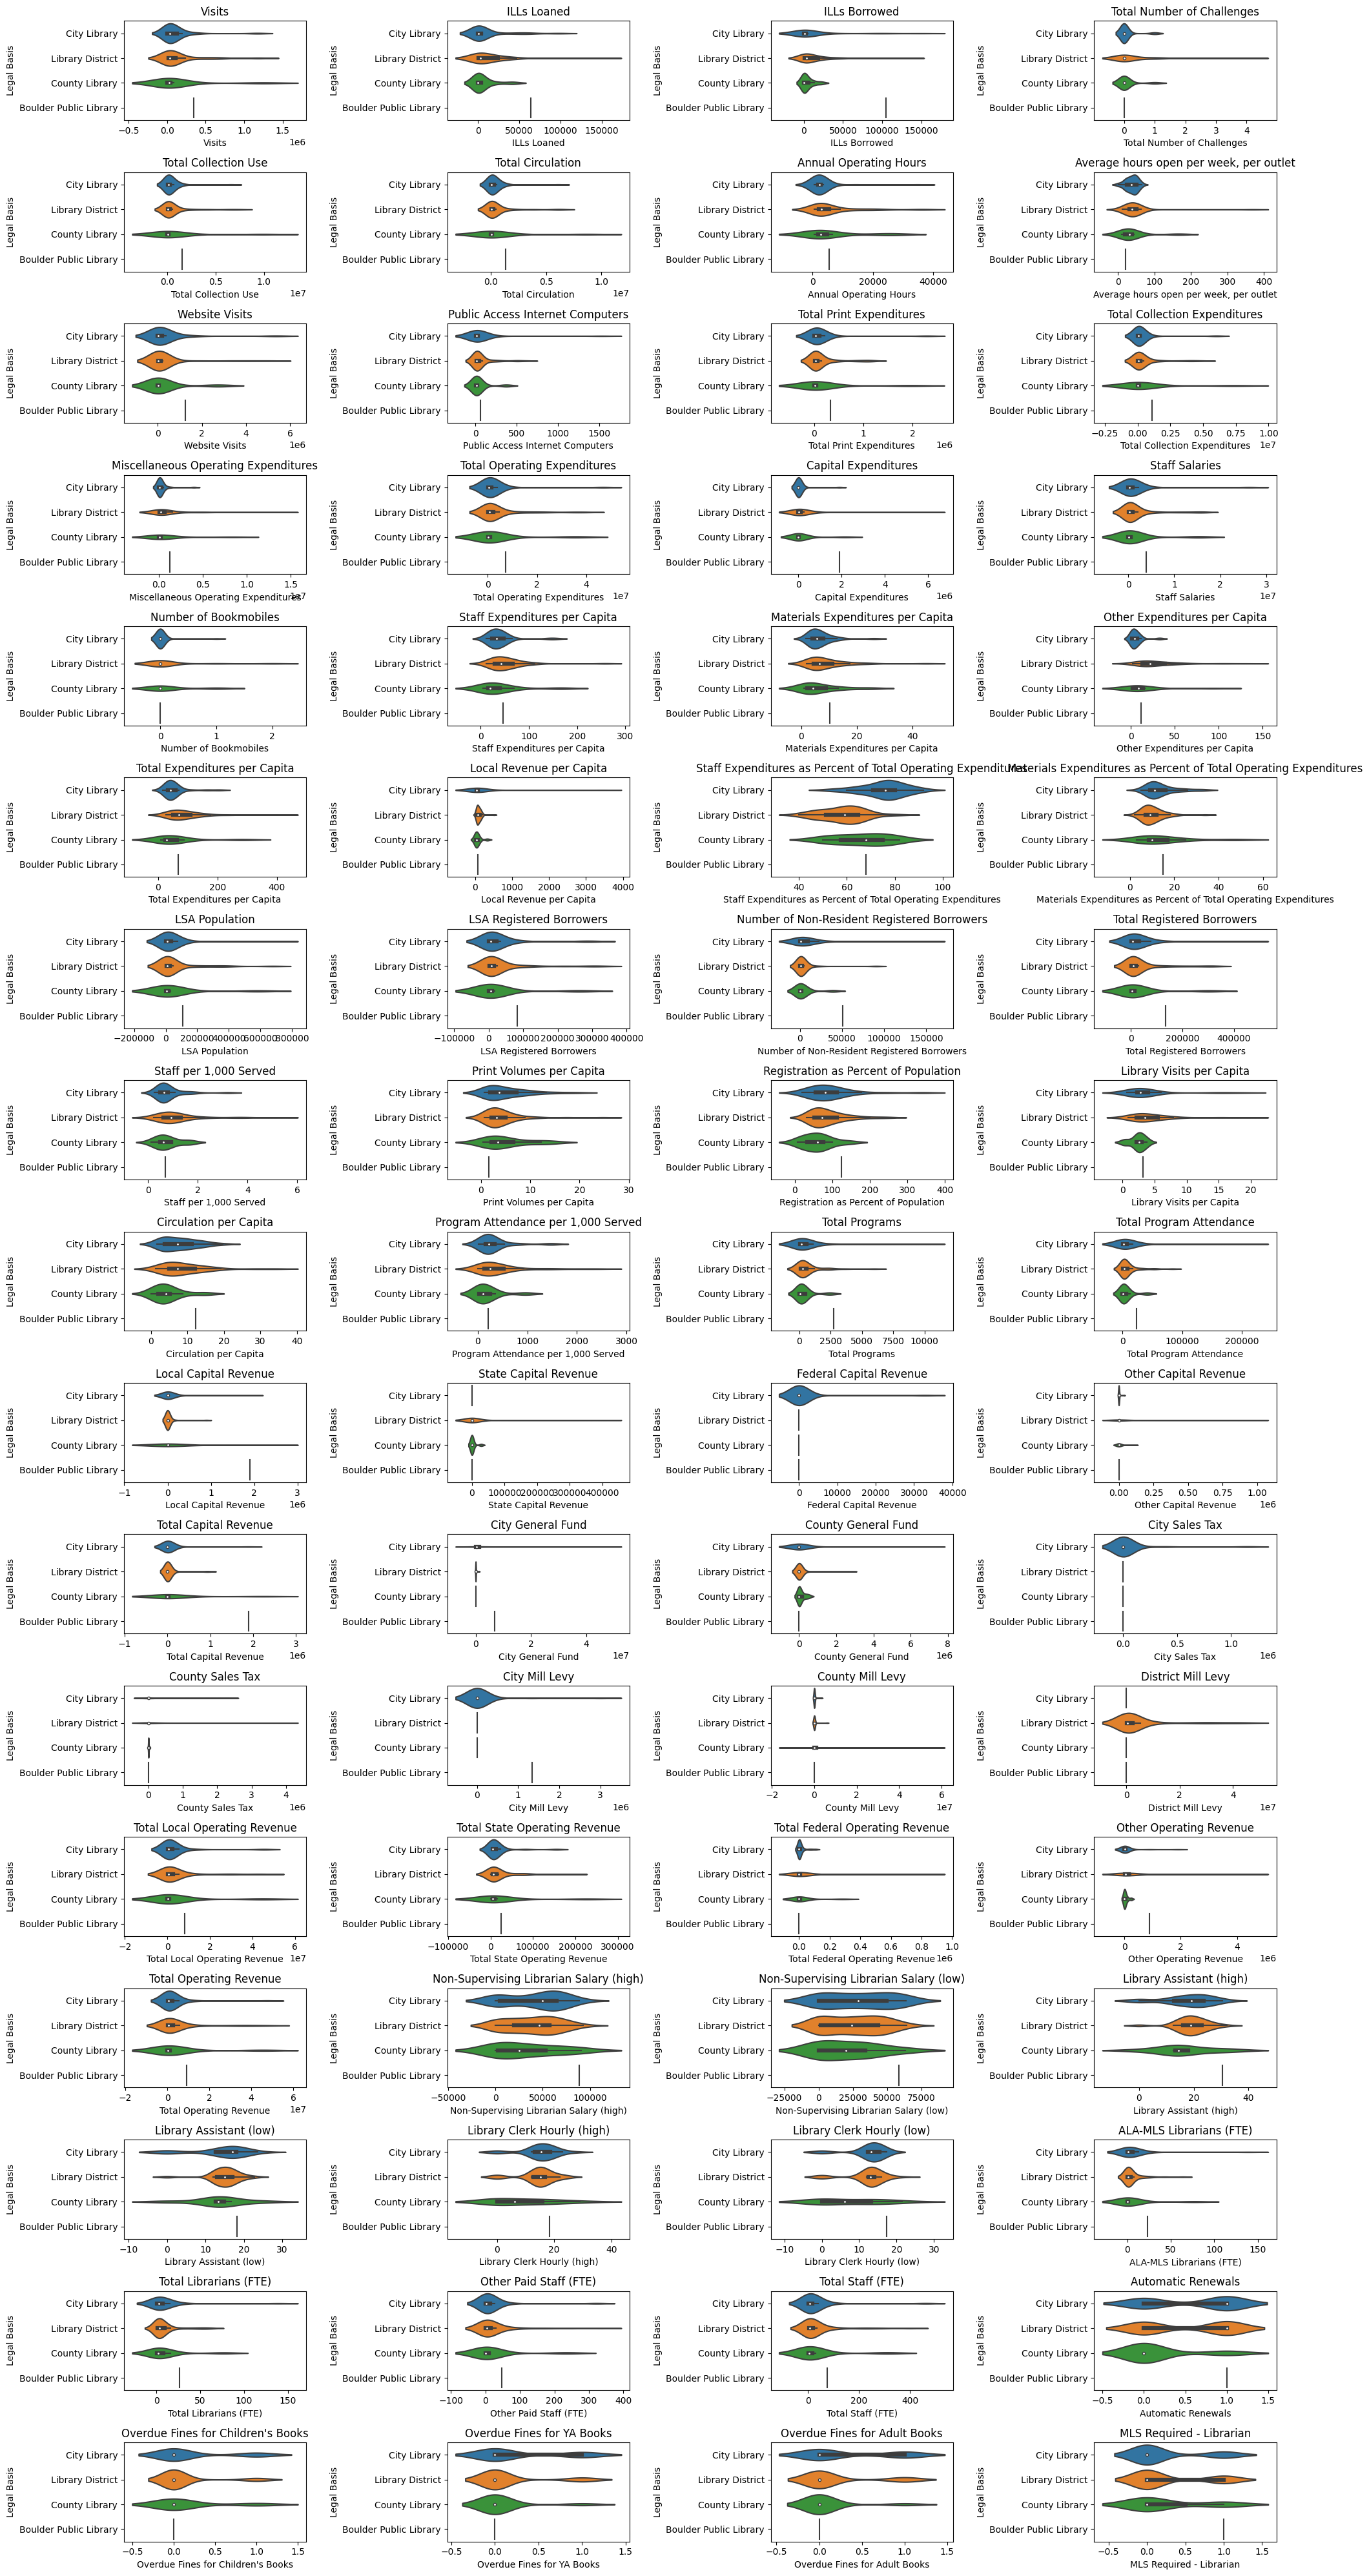

In [10]:
fig,axs = plt.subplots(17,4,figsize=(20,40))
counter=0
for i in range(0,17):
    for j in range(0,4):
        lrs_vilplot(combined[counter],axs[i,j])
        axs[i,j].set_title(combined[counter])
        counter+=1

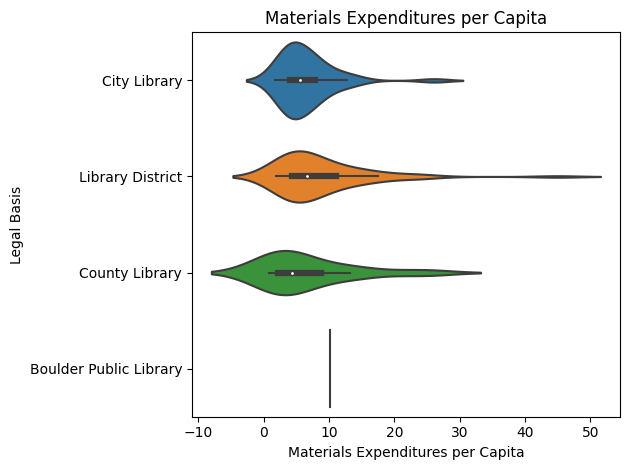

In [15]:
f,ax=plt.subplots()
lrs_vilplot("Materials Expenditures per Capita",ax)
ax.set_title("Materials Expenditures per Capita")
plt.savefig("matExp.png")

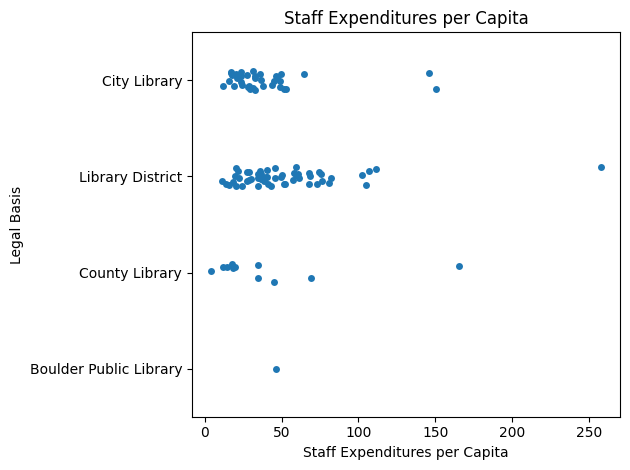

In [16]:
f,ax=plt.subplots()
lrs_stripplot("Staff Expenditures per Capita",ax)
ax.set_title("Staff Expenditures per Capita")
plt.savefig("staffExp.png")

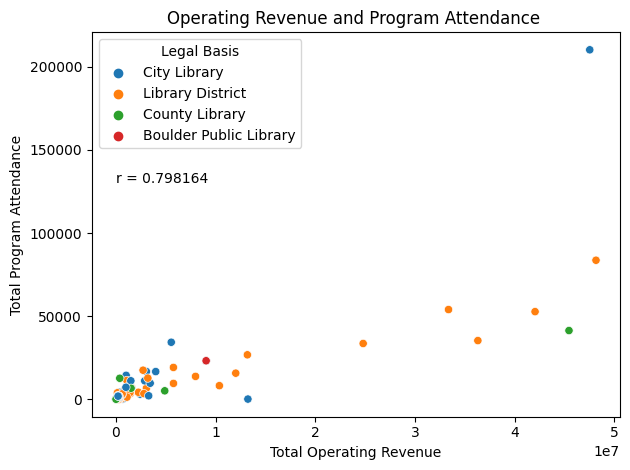

In [11]:
f,ax=plt.subplots()
sb.scatterplot(x="Total Operating Revenue",y="Total Program Attendance",data=all_df,hue="Legal Basis",ax=ax)
plt.annotate(text="r = 0.798164",xy=(5,130000))
ax.set_title("Operating Revenue and Program Attendance ")
plt.savefig("revAtt.png")

In [ ]:
#print volumes per capita = -.29